In [3]:
#Libraries Required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
import joblib


Required libraries and dependencies are imported.

In [5]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We can see the dataset is read from the csv file and been imported into a dataframe using Pandas. Observing the first five rows and last ten rows of dataframe, we can understand that 'quality' is the target variable and the remaining columns are the independent variables.

In [52]:
df.shape

(1599, 12)

We can see that the dataset has 1599 rows and 12 columns out of which 1 column is the target column.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Every column has float datatype. The target variable column is of integer data type.

In [54]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

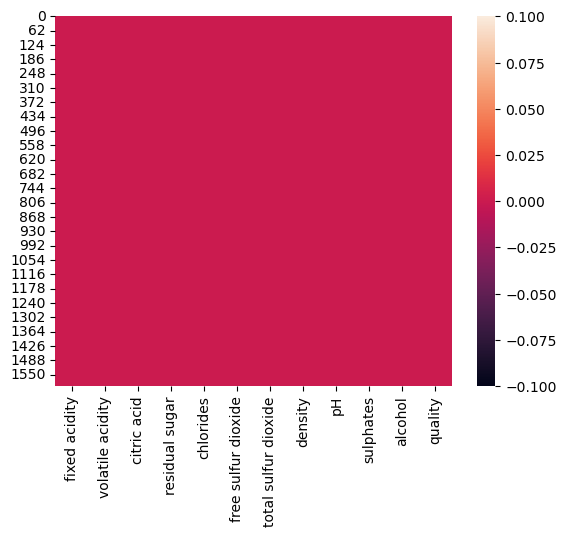

In [55]:
sns.heatmap(df.isnull())

We can see that there are no null values in the given dataset.

In [56]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [57]:
df['quality'].nunique()

6

There are 6 types of numerical scores in the target variable. It is a classification problem. Using different classification techniques, we have to predict the labels.

In [58]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This gives the statistical summary of the dataset. There are no negative values present in the summary. 

From the above statistical summary, we can observe the following:
1. Using the describe method We can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.
2. The counts of all the columns are the same which means there are no missing values in the dataset.
3. The mean value is greater than the median (50%) value in most of the columns except for the target variable which means data is skewed to the right for most of the columns.
4. There are huge differences between 75% and maximum values. There must be outliers present in the data.
5. There are huge gaps between 75% and maximum value of residual sugar, free sulfur dioxide, and total sulfur dioxide columns.

# Data Visualization

<Axes: xlabel='quality', ylabel='count'>

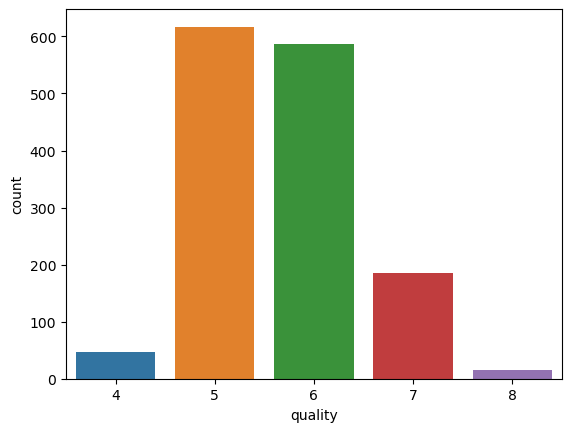

In [139]:
sns.countplot(x='quality',data=df)

We can see that the count of 5 and 6 quality wines are higher than the rest of the wine quality scores, and the least is in 3 and 8. This leads to class imbalance which we have to rectify it later.

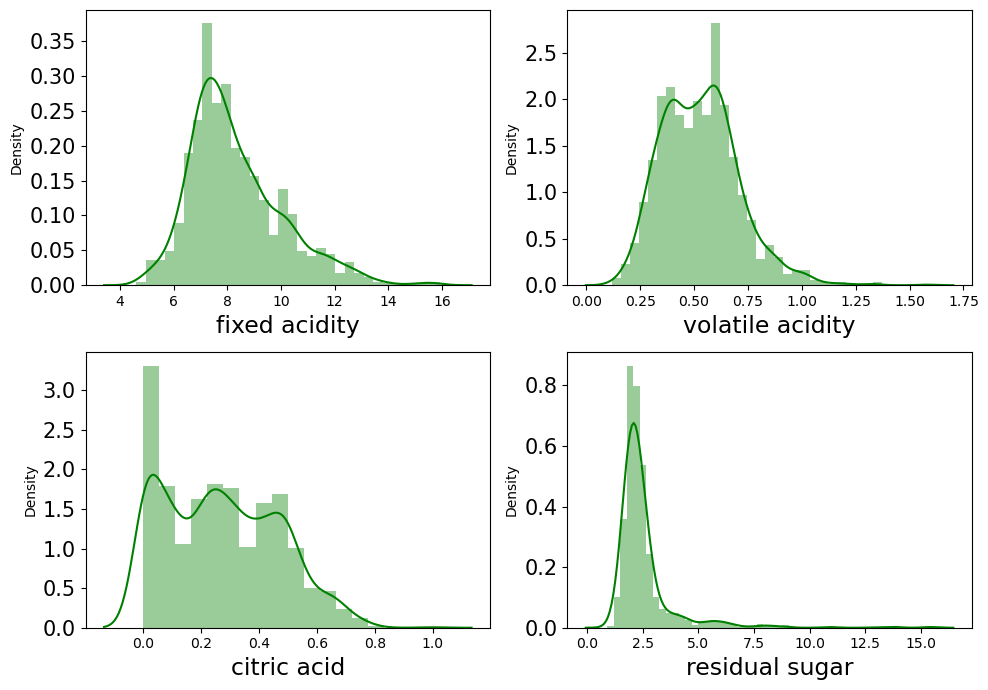

In [60]:
plt.figure(figsize=(10,7))
p=1
for col in df.columns:
    if p<=4:
        a=plt.subplot(2,2,p)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=17)
        plt.yticks(rotation=0,fontsize=15)
    p+=1
plt.tight_layout()

From the above visualization, the data looks almost normal in all the columns.

<Axes: xlabel='quality', ylabel='fixed acidity'>

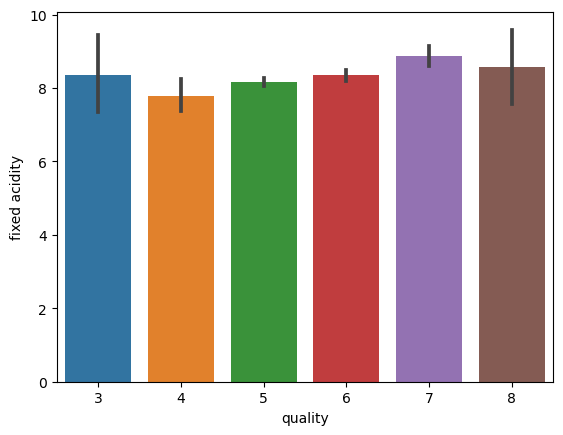

In [61]:
sns.barplot(x='quality',y='fixed acidity',data=df)

We can observe that the fixed acidity doesn't almost increase or decrease no matter what the quality of wine is.

<Axes: xlabel='quality', ylabel='volatile acidity'>

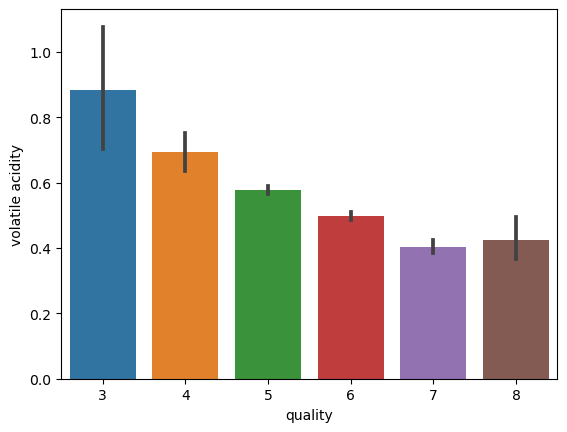

In [62]:
sns.barplot(x='quality',y='volatile acidity',data=df)

We can observe from the bar plot that as the quality increases, volatile acidity decreases.

<Axes: xlabel='quality', ylabel='citric acid'>

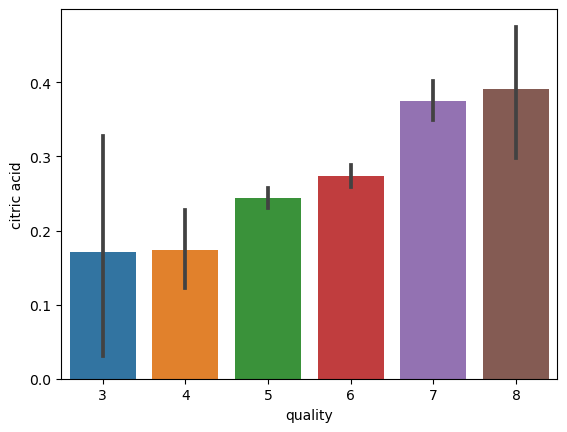

In [63]:
sns.barplot(x='quality',y='citric acid',data=df)

We can observe from the bar graph that as the quality increases, citric acid also increases.

<Axes: xlabel='quality', ylabel='residual sugar'>

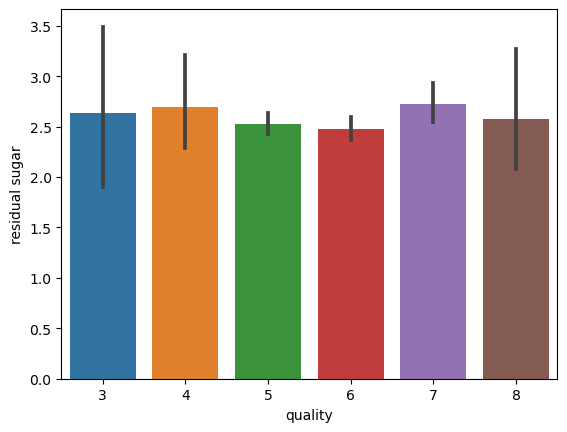

In [64]:
sns.barplot(x='quality',y='residual sugar',data=df)

We can observe that the residual sugar doesn't increase or decrease no matter what the quality of wine is.

<Axes: xlabel='quality', ylabel='chlorides'>

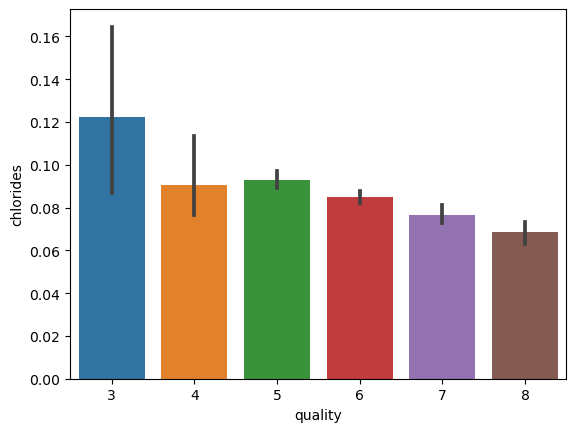

In [6]:
sns.barplot(x='quality',y='chlorides',data=df)

We can see that as the quality of the wine increases, chlorides decreases.

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

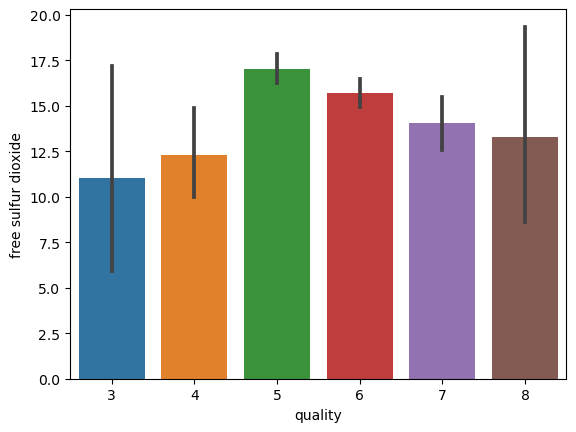

In [66]:
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

We can see that there is no observable constant pattern between the data of free sulfur dioxide and quality.

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

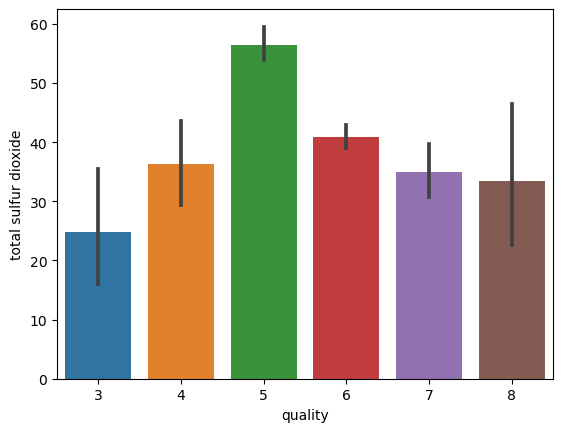

In [67]:
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

We can see that there is no observable constant pattern between the data of total sulfur dioxide and quality.

<Axes: xlabel='quality', ylabel='density'>

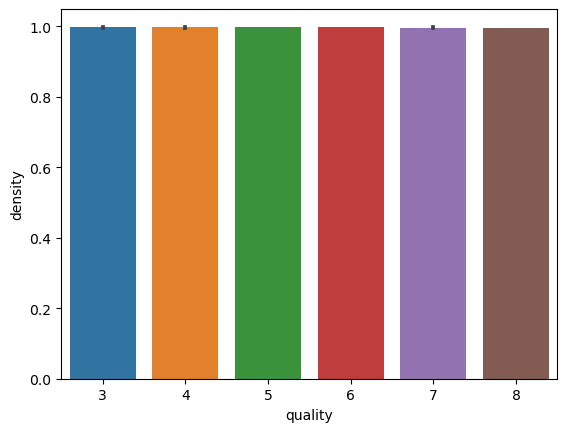

In [68]:
sns.barplot(x='quality',y='density',data=df)

We can see that density of the wine doesn't decrease or increase no matter what the quality of wine is.

<Axes: xlabel='quality', ylabel='pH'>

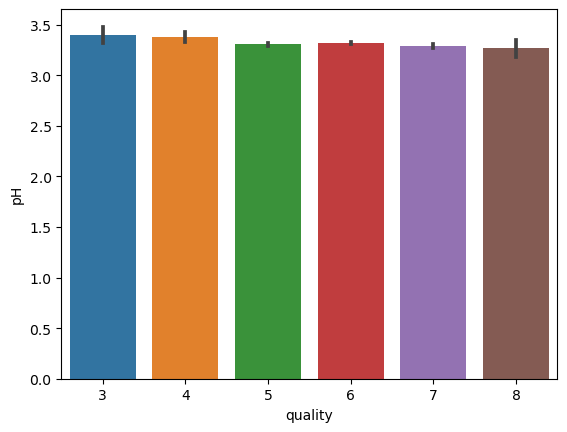

In [69]:
sns.barplot(x='quality',y='pH',data=df)

We can see that pH of the wine doesn't decrease or increase no matter what the quality of wine is.

<Axes: xlabel='quality', ylabel='sulphates'>

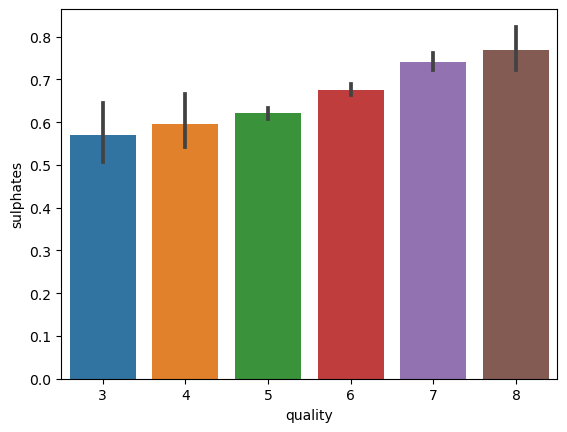

In [70]:
sns.barplot(x='quality',y='sulphates',data=df)

We can observe from the bar graph that as the quality of the wine increases, sulphates increase.

<Axes: xlabel='quality', ylabel='alcohol'>

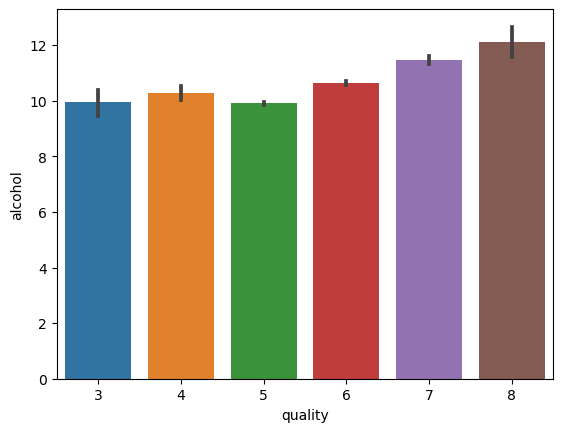

In [71]:
sns.barplot(x='quality',y='alcohol',data=df)

We can observe from the bar graph that as the quality of the wine increases, alcohol increases.

<Axes: ylabel='fixed acidity'>

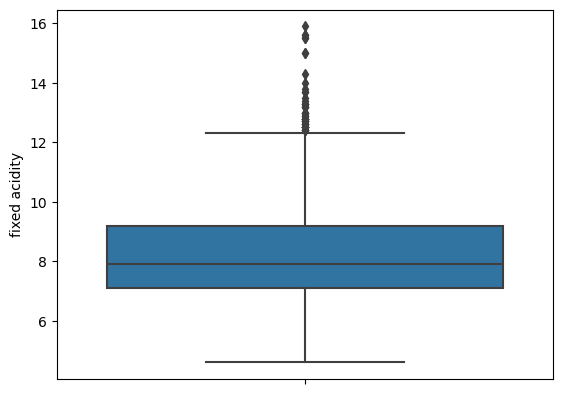

In [72]:
sns.boxplot(y='fixed acidity', data=df)

<Axes: ylabel='volatile acidity'>

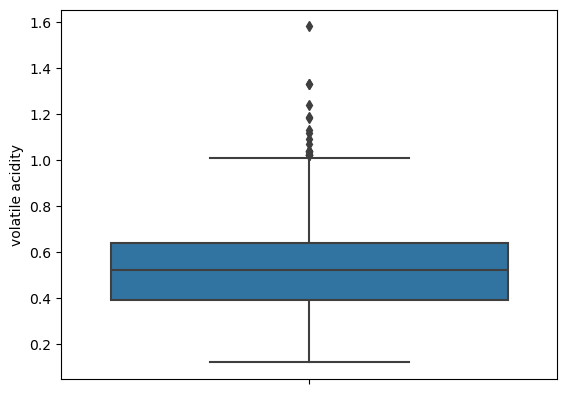

In [73]:
sns.boxplot(y='volatile acidity', data=df)

<Axes: ylabel='citric acid'>

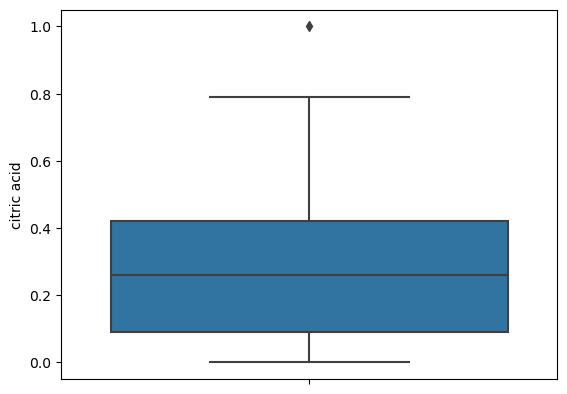

In [74]:
sns.boxplot(y='citric acid', data=df)

<Axes: ylabel='residual sugar'>

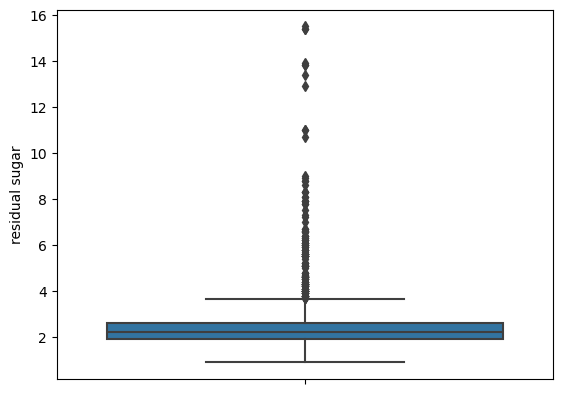

In [75]:
sns.boxplot(y='residual sugar', data=df)

<Axes: ylabel='chlorides'>

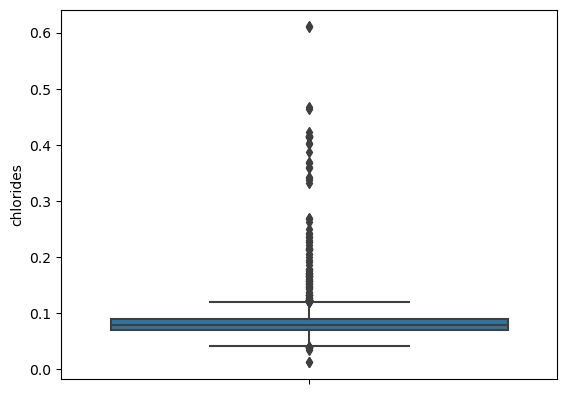

In [76]:
sns.boxplot(y='chlorides', data=df)

<Axes: ylabel='free sulfur dioxide'>

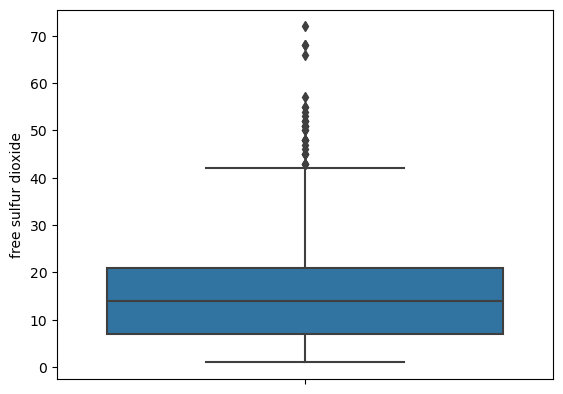

In [77]:
sns.boxplot(y='free sulfur dioxide', data=df)

<Axes: ylabel='total sulfur dioxide'>

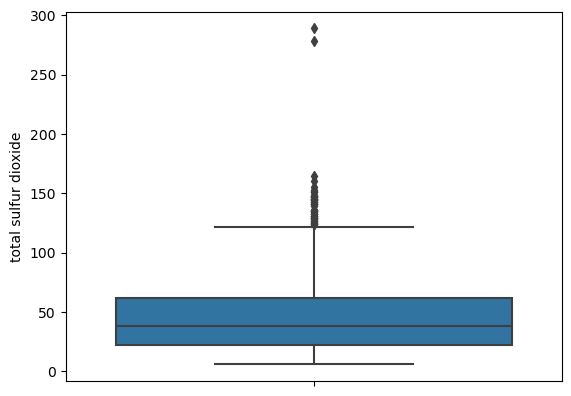

In [78]:
sns.boxplot(y='total sulfur dioxide', data=df)

<Axes: ylabel='density'>

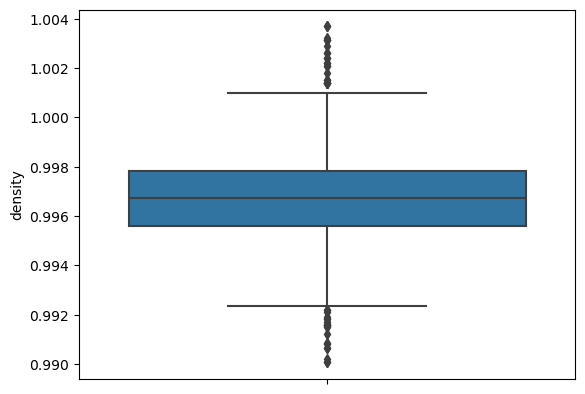

In [79]:
sns.boxplot(y='density', data=df)

<Axes: ylabel='pH'>

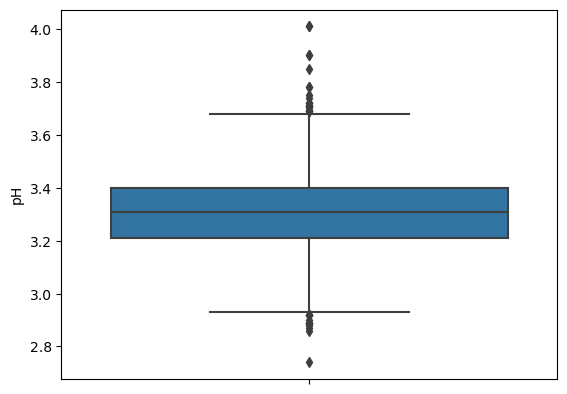

In [80]:
sns.boxplot(y='pH', data=df)

<Axes: ylabel='sulphates'>

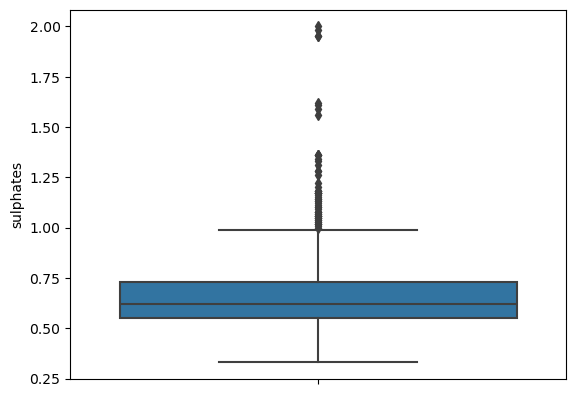

In [81]:
sns.boxplot(y='sulphates', data=df)

<Axes: ylabel='alcohol'>

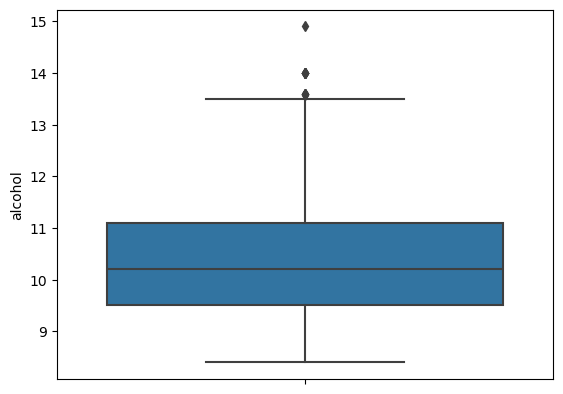

In [82]:
sns.boxplot(y='alcohol', data=df)

With the help of the above boxplots, we are able to see the outliers clearly.

In [83]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

There is skewness in the dataset in residual sugar, chlorides. This indicates that the outliers are present and need to be removed.

In [84]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Feature Scaling:

In [8]:
x=df.drop('quality', axis=1)
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [9]:
y=df['quality']
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Removing the Class imbalance:

In [10]:
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [88]:
y.value_counts()

quality
5    617
6    617
7    617
4    617
8    617
Name: count, dtype: int64

Finding the best random state:

In [89]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is: ',maxAccu,'at random state ',maxRS)

Best Accuracy is:  0.899513776337115 at random state  94


Logistic Regression:

In [90]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.5786061588330632
[[90 23  8  2  0]
 [20 56 25  5  1]
 [14 37 41 29 12]
 [10  4 22 75 24]
 [ 0  0  0 24 95]]
              precision    recall  f1-score   support

           4       0.67      0.73      0.70       123
           5       0.47      0.52      0.49       107
           6       0.43      0.31      0.36       133
           7       0.56      0.56      0.56       135
           8       0.72      0.80      0.76       119

    accuracy                           0.58       617
   macro avg       0.57      0.58      0.57       617
weighted avg       0.57      0.58      0.57       617



Support Vector Classifier:

In [91]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7439222042139384
[[114   5   4   0   0]
 [ 11  63  29   3   1]
 [  9  40  55  22   7]
 [  4   6  12 108   5]
 [  0   0   0   0 119]]
              precision    recall  f1-score   support

           4       0.83      0.93      0.87       123
           5       0.55      0.59      0.57       107
           6       0.55      0.41      0.47       133
           7       0.81      0.80      0.81       135
           8       0.90      1.00      0.95       119

    accuracy                           0.74       617
   macro avg       0.73      0.75      0.73       617
weighted avg       0.73      0.74      0.73       617



Decision Tree Classifier:

In [92]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7828200972447326
[[110   7   4   2   0]
 [  8  73  20   4   2]
 [  6  31  76  20   0]
 [  3   4  15 110   3]
 [  0   0   3   2 114]]
              precision    recall  f1-score   support

           4       0.87      0.89      0.88       123
           5       0.63      0.68      0.66       107
           6       0.64      0.57      0.61       133
           7       0.80      0.81      0.81       135
           8       0.96      0.96      0.96       119

    accuracy                           0.78       617
   macro avg       0.78      0.78      0.78       617
weighted avg       0.78      0.78      0.78       617



KNeighbors Classifier:

In [93]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7893030794165316
[[122   0   0   1   0]
 [ 10  66  25   6   0]
 [ 13  28  57  29   6]
 [  0   3   5 124   3]
 [  0   0   0   1 118]]
              precision    recall  f1-score   support

           4       0.84      0.99      0.91       123
           5       0.68      0.62      0.65       107
           6       0.66      0.43      0.52       133
           7       0.77      0.92      0.84       135
           8       0.93      0.99      0.96       119

    accuracy                           0.79       617
   macro avg       0.78      0.79      0.77       617
weighted avg       0.77      0.79      0.77       617



Random Forest Classifier:

In [94]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8541329011345219
[[117   4   2   0   0]
 [  2  82  20   3   0]
 [  1  27  86  17   2]
 [  0   4   7 124   0]
 [  0   0   0   1 118]]
              precision    recall  f1-score   support

           4       0.97      0.95      0.96       123
           5       0.70      0.77      0.73       107
           6       0.75      0.65      0.69       133
           7       0.86      0.92      0.89       135
           8       0.98      0.99      0.99       119

    accuracy                           0.85       617
   macro avg       0.85      0.85      0.85       617
weighted avg       0.85      0.85      0.85       617



Extra Trees Classifier:

In [95]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.8622366288492707
[[123   0   0   0   0]
 [  4  79  22   2   0]
 [  2  29  86  14   2]
 [  0   3   7 125   0]
 [  0   0   0   0 119]]
              precision    recall  f1-score   support

           4       0.95      1.00      0.98       123
           5       0.71      0.74      0.72       107
           6       0.75      0.65      0.69       133
           7       0.89      0.93      0.91       135
           8       0.98      1.00      0.99       119

    accuracy                           0.86       617
   macro avg       0.86      0.86      0.86       617
weighted avg       0.86      0.86      0.86       617



Gradient Boosting Classifier:

In [96]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.7876823338735819
[[111   5   7   0   0]
 [  4  80  19   4   0]
 [  5  45  61  20   2]
 [  2   5  11 115   2]
 [  0   0   0   0 119]]
              precision    recall  f1-score   support

           4       0.91      0.90      0.91       123
           5       0.59      0.75      0.66       107
           6       0.62      0.46      0.53       133
           7       0.83      0.85      0.84       135
           8       0.97      1.00      0.98       119

    accuracy                           0.79       617
   macro avg       0.78      0.79      0.78       617
weighted avg       0.79      0.79      0.78       617



Ada Boost Classifier:

In [97]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.45705024311183146
[[90 25  8  0  0]
 [65 18 18  5  1]
 [41 21 38 27  6]
 [10  7 20 64 34]
 [ 0  0  1 46 72]]
              precision    recall  f1-score   support

           4       0.44      0.73      0.55       123
           5       0.25      0.17      0.20       107
           6       0.45      0.29      0.35       133
           7       0.45      0.47      0.46       135
           8       0.64      0.61      0.62       119

    accuracy                           0.46       617
   macro avg       0.45      0.45      0.44       617
weighted avg       0.45      0.46      0.44       617



Bagging Classifier:

In [98]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8103727714748784
[[114   3   5   1   0]
 [  6  73  25   3   0]
 [  4  32  79  16   2]
 [  3   5   8 119   0]
 [  0   0   2   2 115]]
              precision    recall  f1-score   support

           4       0.90      0.93      0.91       123
           5       0.65      0.68      0.66       107
           6       0.66      0.59      0.63       133
           7       0.84      0.88      0.86       135
           8       0.98      0.97      0.97       119

    accuracy                           0.81       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.81      0.81      0.81       617



In [109]:
s=cross_val_score(lg,x,y)
print(s)
print(s.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predlg)-s.mean())

[0.59643436 0.55105348 0.55753647 0.59481361 0.55915721]
0.5717990275526742
Difference between accuracy score and cross validation score:  0.006807131280389012


In [110]:
s1=cross_val_score(svc,x,y)
print(s1)
print(s1.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predsvc)-s1.mean())

[0.7471637  0.71961102 0.72447326 0.75364668 0.72771475]
0.7345218800648298
Difference between accuracy score and cross validation score:  0.00940032414910863


In [111]:
s2=cross_val_score(dtc,x,y)
print(s2)
print(s2.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,preddtc)-s2.mean())

[0.67909238 0.71150729 0.70178282 0.71150729 0.70502431]
0.7017828200972447
Difference between accuracy score and cross validation score:  0.08103727714748787


In [112]:
s3=cross_val_score(knn,x,y)
print(s3)
print(s3.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predknn)-s3.mean())

[0.71636953 0.73419773 0.73905997 0.70340357 0.75202593]
0.7290113452188007
Difference between accuracy score and cross validation score:  0.06029173419773082


In [113]:
s4=cross_val_score(rfc,x,y)
print(s4)
print(s4.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predrfc)-s4.mean())

[0.76823339 0.76661264 0.7649919  0.8006483  0.79092382]
0.7782820097244733
Difference between accuracy score and cross validation score:  0.07585089141004864


In [114]:
s5=cross_val_score(etc,x,y)
print(s5)
print(s5.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predetc)-s5.mean())

[0.80713128 0.80226904 0.77795786 0.82171799 0.81361426]
0.8045380875202592
Difference between accuracy score and cross validation score:  0.05769854132901142


In [115]:
s6=cross_val_score(gbc,x,y)
print(s6)
print(s6.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predgbc)-s6.mean())

[0.72447326 0.7439222  0.72933549 0.76985413 0.75364668]
0.7442463533225283
Difference between accuracy score and cross validation score:  0.04343598055105358


In [116]:
s7=cross_val_score(abc,x,y)
print(s7)
print(s7.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predabc)-s7.mean())

[0.45867099 0.47487844 0.40518639 0.52836305 0.50243112]
0.47390599675850886
Difference between accuracy score and cross validation score:  -0.016855753646677407


In [117]:
s8=cross_val_score(bc,x,y)
print(s8)
print(s8.mean())
print('Difference between accuracy score and cross validation score: ',accuracy_score(y_test,predbc)-s8.mean())

[0.70178282 0.73581848 0.73743922 0.73581848 0.73743922]
0.7296596434359806
Difference between accuracy score and cross validation score:  0.08071312803889785


In [131]:
final_model=gbc

In [138]:
filename = "FinalModel.pkl"
joblib.dump(final_model, filename)

['FinalModel.pkl']